<a href="https://colab.research.google.com/github/JustinhSE/Handwritten-Nums/blob/main/handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

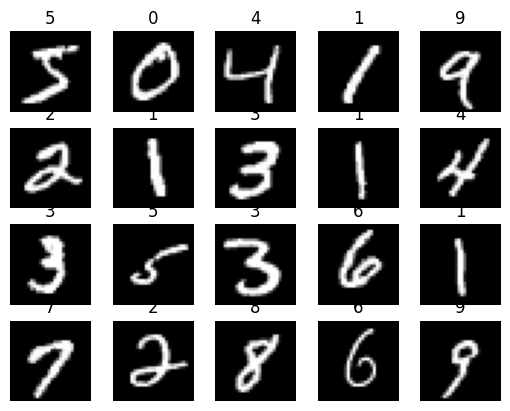

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualize a sample of the handwritten images
for i in range(20):
  plt.subplot(4, 5, i + 1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(y_train[i])
  plt.axis('off')

plt.show()




In [9]:
import tensorflow as tf
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.datasets import mnist

# Loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create the CNN
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Train the CNN model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=11)

# Making KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Training the KNN on the output of the CNN model
knn.fit(model.predict(x_train), y_train)

# Accuracy of KNN on current data
print("Accuracy of KNN on test data:", knn.score(model.predict(x_test), y_test))


Epoch 1/11
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2665 - accuracy: 0.9230
Epoch 2/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1198 - accuracy: 0.9640
Epoch 3/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0820 - accuracy: 0.9751
Epoch 4/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0606 - accuracy: 0.9813
Epoch 5/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0470 - accuracy: 0.9854
Epoch 6/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0368 - accuracy: 0.9886
Epoch 7/11
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0288 - accuracy: 0.9913
Epoch 8/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0238 - accuracy: 0.9929
Epoch 9/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0203 - accuracy: 0.9939
Epoch 10/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01


Possible loss functions to explore (based on loss function and accuracy)  

- loss='sparse_categorical_crossentropy', - the best

- loss='mean_squared_error', - 2nd to worst

- loss='hinge', - worst




Initially was going to use binary crossentropy but there seems to be an issue with keras computing accuracy during image classification using it:


> Keras does not define a single accuracy metric, but several different ones, among them binary_accuracy and categorical_accuracy. What happens under the hood is that, since you have selected binary cross entropy as your loss function and have not specified a particular accuracy metric, Keras (wrongly...) infers that you are interested in the binary_accuracy, and this is what it returns - while in fact you are interested in the categorical_accuracy.

